
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [63]:
tf.__version__

'2.15.0'

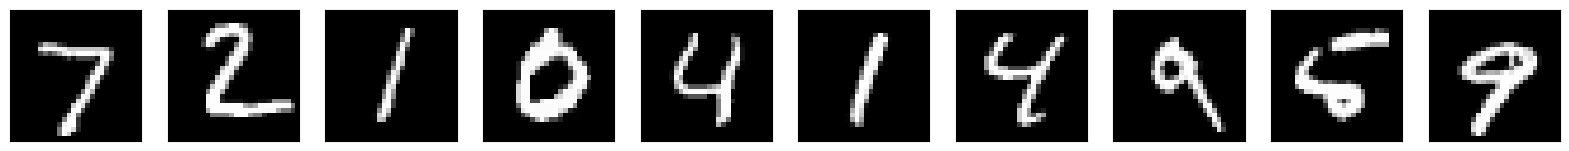

In [64]:
# Plot a few data points
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [65]:
# Normalize to run the training easily!
x_train = x_train/255
x_test = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [86]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(560,activation="relu"))
encoder.add(Dense(225,activation="relu"))
encoder.add(Dense(128,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [87]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(120,activation='relu'))
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(512,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [88]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [89]:
autoencoder.fit(x_train, x_train, epochs=10,validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6894 - accuracy: 0.0416 - val_loss: 0.6848 - val_accuracy: 0.0478
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5914 - accuracy: 0.0551 - val_loss: 0.2922 - val_accuracy: 0.1018
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2751 - accuracy: 0.0945 - val_loss: 0.2693 - val_accuracy: 0.1067
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2679 - accuracy: 0.1059 - val_loss: 0.2657 - val_accuracy: 0.1058
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2649 - accuracy: 0.0827 - val_loss: 0.2634 - val_accuracy: 0.0680
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2628 - accuracy: 0.0703 - val_loss: 0.2615 - val_accuracy: 0.0709
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.0703 - val_loss: 0.2598 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


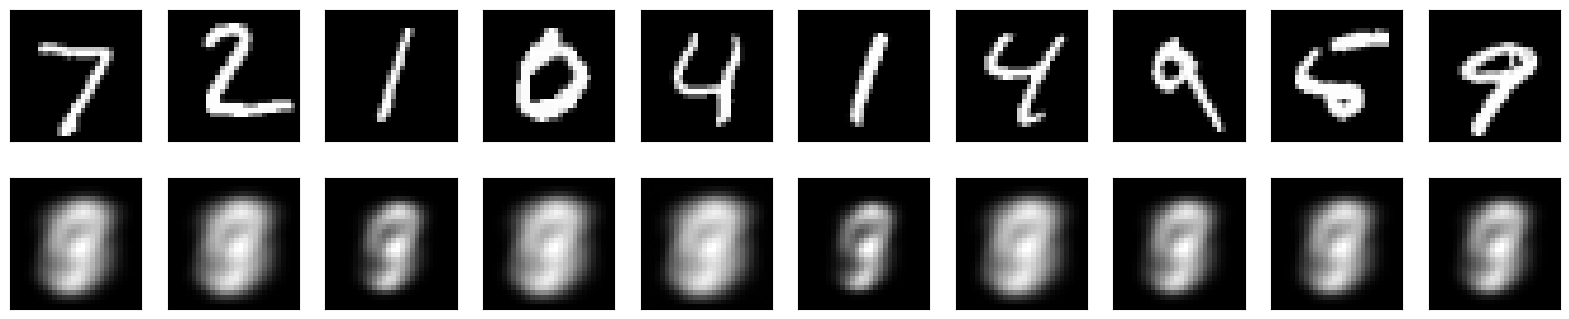

In [90]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gsussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [91]:
from tensorflow.keras.layers import GaussianNoise

In [92]:
sample = GaussianNoise(0.2)

In [93]:
noisey = sample(x_test[0:2],training=True)

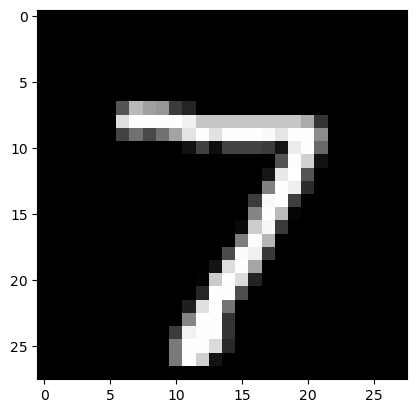

In [94]:
plt.imshow(x_test[0])

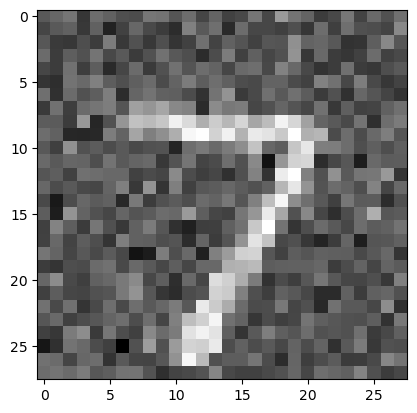

In [95]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

Again similar to above it is a symmetric dense network. Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs. 

In [96]:
import tensorflow as tf
import numpy as np

In [97]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(512,activation="relu"))
encoder.add(Dense(256,activation="relu"))
encoder.add(Dense(128,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [98]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(120,activation='relu'))
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(512,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [99]:
noise_remover = Sequential([encoder, decoder])

In [100]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [101]:
noise_remover.fit(x_train, x_train, epochs=8,
                           validation_data=[x_test, x_test])

Epoch 1/8
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1599 - accuracy: 0.1957 - val_loss: 0.1252 - val_accuracy: 0.2360
Epoch 2/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1218 - accuracy: 0.2441 - val_loss: 0.1129 - val_accuracy: 0.2529
Epoch 3/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1130 - accuracy: 0.2577 - val_loss: 0.1064 - val_accuracy: 0.2603
Epoch 4/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1085 - accuracy: 0.2659 - val_loss: 0.1020 - val_accuracy: 0.2757
Epoch 5/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1053 - accuracy: 0.2723 - val_loss: 0.0998 - val_accuracy: 0.2785
Epoch 6/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1032 - accuracy: 0.2776 - val_loss: 0.0987 - val_accuracy: 0.2818
Epoch 7/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1017 - accuracy: 0.2802 - val_loss: 0.0973 - val_accuracy:

In [102]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


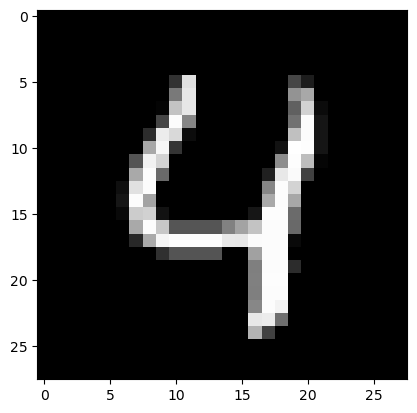

The Noisey Version


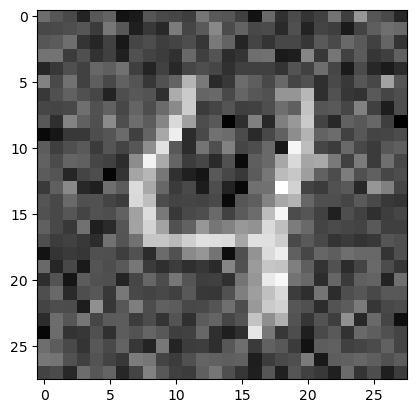

After going through denoiser


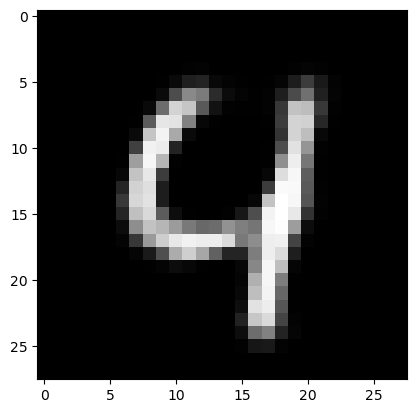

In [103]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

In [104]:
print("\nEncoder Summary:")
encoder.summary()

print("\nDecoder Summary:")
decoder.summary()

print("\nDenoising Autoencoder Summary:")
noise_remover.summary()


Encoder Summary:
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_7 (Gaussian  (None, 784)               0         
 Noise)                                                          
                                                                 
 dense_74 (Dense)            (None, 512)               401920    
                                                                 
 dense_75 (Dense)            (None, 256)               131328    
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dense_77 (Dense)            (None, 25)                3225      
                                   

## Challenge to followup!

Above is a simple dense network. Build a CNN based autoencoder to perform similar tasks! 

Hint: You may want to use UpSample layers in the decoder. 
